In [2]:
from sklearn.datasets import fetch_openml
import pandas as pd

In [3]:
minst = fetch_openml('mnist_784', as_frame=False,parser="auto")

In [4]:
X, y = minst.data, minst.target

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (70000, 784)
y shape: (70000,)


In [5]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

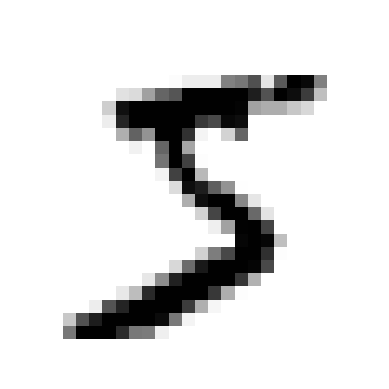

The label for this digit is: 5


In [6]:
# Explore Data

some_digit = X[0]
plot_digit(some_digit)
plt.show()
print(f"The label for this digit is: {y[0]}")

In [7]:
# Split Dataset -> Train (60k) + Test (10k)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(f"X_train size is {X_train.shape} and y_train is {y_train.shape}")
print(f"X_test size is {X_test.shape} and y_test is {y_test.shape}")

X_train size is (60000, 784) and y_train is (60000,)
X_test size is (10000, 784) and y_test is (10000,)


In [8]:
####################################################################################################
######### Training Binary Classifier
####################################################################################################
from sklearn.linear_model import SGDClassifier

y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

array([ True])

In [9]:
####################################################################################################
######### Training Dummy Classifier  (ignores input, always predicts the most_frequent class)
####################################################################################################
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train_5)
dummy_predicted = dummy_clf.predict(X_test)
pd.DataFrame({'Predicted': dummy_predicted}).value_counts()

Predicted
False        10000
dtype: int64

In [10]:
####################################################################################################
######### SGD Cross Validation Prediction
####################################################################################################
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [11]:
# SGD Binary: Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [12]:
# Calculate Precision/Recall
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)

print(f"Precision score: {precision}")
print(f"Recall score: {recall}")

# Out of all predicted positive 5, 80% were actually positive
# Out of all actual 5s, we predicted only 65%

Precision score: 0.8370879772350012
Recall score: 0.6511713705958311


In [13]:
# Calculate F1 score (precision/recall)
from sklearn.metrics import f1_score

f1 = f1_score(y_train_5, y_train_pred)

print(f"F1 score: {f1}")

F1 score: 0.7325171197343846


In [14]:
####################################################################################################
######### SVM : Train Multiclass Classifier - One-versus-One
####################################################################################################
from sklearn.svm import SVC

svc_clf = SVC(random_state=42)
svc_clf.fit(X_train[:2000], y_train[:2000]);

In [15]:
predicted_digit = svc_clf.predict([some_digit])[0]
print(f"Predicted digit: {predicted_digit}")

Predicted digit: 5


In [16]:
####################################################################################################
######### SVM: Train Multiclass Classifier - One-versus-All
####################################################################################################
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000]);

In [17]:
predicted_digit = svc_clf.predict([some_digit])[0]
print(f"Predicted digit: {predicted_digit}")

Predicted digit: 5


In [19]:
####################################################################################################
######### SGD: Stochastic Gradient Descent
####################################################################################################
from sklearn.model_selection import cross_val_predict

predict = cross_val_predict(sgd_clf, X_train[:2000], y_train[:2000], cv=3)

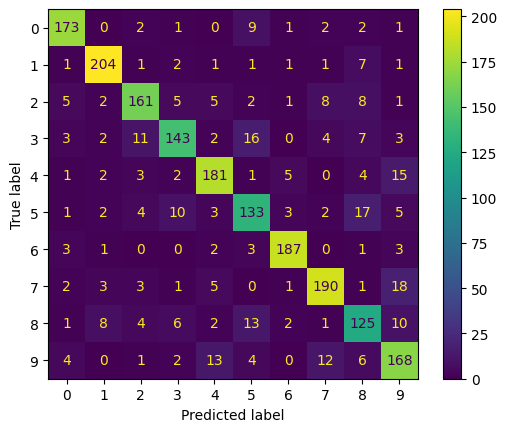

In [20]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train[:2000], predict)
plt.show()